In [10]:
import requests
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import pandas as pd


In [11]:
response = requests.get("http://usapl.liftingdatabase.com/competitions-view?id=1649")

html = response.text

In [12]:
result_records = []

events = ["Female - Junior", "Female - Master 1", "Female - Master 2", "Female - Master 3", "Female - Master 4",
         "Female - Open", "Female - Teen 1", "Female - Teen 2", "Female - Teen 3", "Male - Junior", "Male - Master 1",
         "Male - Master 2", "Male - Master 3", "Male - Master 4", "Male - Master 5", "Male - Open", "Male - Teen 1",
         "Male - Teen 2", "Male - Teen 3"] # update this as appropriate
current_event = False

for table_row in Selector(text=html).xpath("//table[@id='competition_view_results']/tbody/tr"):

    last_competition_type = table_row.xpath(".//th/text()").extract_first(default="None").strip()

    if last_competition_type.strip() in events: 
        current_event = last_competition_type
    
    row_data = table_row.xpath("./td/text()").extract()
    
    if len(row_data) > 0:
        result_records.append([current_event] + row_data)

# Then from here you could probably figure out which columns match to which offsets
df = pd.DataFrame(result_records, dtype='string')
df = df.applymap(lambda value: value.strip() if type(value) == unicode else value)



In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Female - Junior,-52,1.,1994,TX,47.03,147.5,155,-160,75,80,85,150,160,-167.5,400,537.72,None
1,Female - Junior,-52,2.,1997,TX,51.61,145,152.5,-160,-90,90,95,140,152.5,-157.5,400,501.56,X
2,Female - Junior,-57,1.,1994,WI,56.03,172.5,182.5,190,115,122.5,130,167.5,180,-190,500,588.05,X
3,Female - Junior,-63,1.,1994,VA,62.74,170,180,-185,110,115,-120.5,167.5,177.5,-185,472.5,509.02,None
4,Female - Junior,-63,2.,1995,WI,61.43,-162.5,-162.5,162.5,85,87.5,92.5,137.5,142.5,147.5,402.5,440.66,None


In [14]:
import unicodedata

In [161]:
#unicodedata.numeric()

In [15]:
df.shape

(259, 18)

In [16]:
df.columns = ['class', 'weight_class', 'rank', 'birth_year', 'state', 'weight', 'squat_1', 'squat_2', 'squat_3', 'bench_1', 
             'bench_2', 'bench_3', 'dl_1', 'dl_2', 'dl_3', 'total', 'score', 'drug'] 




In [17]:
df.drug = df.drug.map(lambda x: 1 if x == 'X' else 0)

In [19]:
def convert_numeric(val):
    if str(val).isdigit():
        val = float(str((val)))
        return val
    else: 
        return str(val)
    
df = df.applymap(convert_numeric)

In [36]:
df.head()

,class,weight_class,rank,birth_year,state,weight,squat_1,squat_2,squat_3,bench_1,bench_2,bench_3,dl_1,dl_2,dl_3,total,score,drug
0,Female - Junior,-52,1.,1994.0,TX,47.03,147.5,155.0,-160.0,75.0,80.0,85.0,150.0,160.0,-167.5,400.0,537.72,0.0
1,Female - Junior,-52,2.,1997.0,TX,51.61,145.0,152.5,-160.0,-90.0,90.0,95.0,140.0,152.5,-157.5,400.0,501.56,1.0
2,Female - Junior,-57,1.,1994.0,WI,56.03,172.5,182.5,190.0,115.0,122.5,130.0,167.5,180.0,-190.0,500.0,588.05,1.0
3,Female - Junior,-63,1.,1994.0,VA,62.74,170.0,180.0,-185.0,110.0,115.0,-120.5,167.5,177.5,-185.0,472.5,509.02,0.0
4,Female - Junior,-63,2.,1995.0,WI,61.43,-162.5,-162.5,162.5,85.0,87.5,92.5,137.5,142.5,147.5,402.5,440.66,0.0


In [22]:
df.iloc[256, 8]

''

In [34]:
import numpy as np
df = df.replace('', np.nan)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 18 columns):
class           259 non-null object
weight_class    259 non-null object
rank            259 non-null object
birth_year      259 non-null float64
state           259 non-null object
weight          259 non-null float64
squat_1         259 non-null float64
squat_2         258 non-null float64
squat_3         255 non-null float64
bench_1         257 non-null float64
bench_2         254 non-null float64
bench_3         250 non-null float64
dl_1            254 non-null float64
dl_2            250 non-null float64
dl_3            245 non-null float64
total           259 non-null float64
score           259 non-null float64
drug            259 non-null float64
dtypes: float64(14), object(4)
memory usage: 36.5+ KB


In [28]:
def floater(series):
    return pd.to_numeric(series, errors='ignore')

df = df.apply(floater)


In [40]:
gender = ['Male' if 'Male' in x else "Female" for x in df['class'].values]

In [41]:
df['gender'] = gender

In [54]:
df.groupby(('weight_class', 'gender'))['total'].mean()

weight_class  gender
-105          Male      754.916667
-120          Male      678.382353
-43           Female    285.000000
-47           Female    282.142857
-52           Female    320.062500
-53           Male      455.625000
-57           Female    336.916667
-59           Male      542.055556
-63           Female    405.166667
-66           Male      533.333333
-72           Female    445.769231
              Male      370.000000
-74           Male      573.333333
-83           Male      632.272727
-84           Female    452.535714
-93           Male      603.695652
120+          Male      658.333333
84+           Female    440.909091
Name: total, dtype: float64

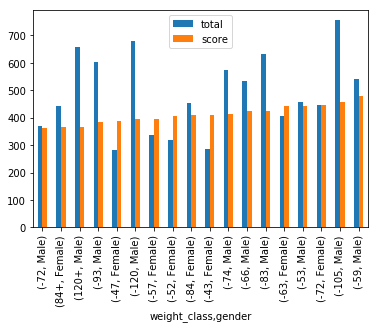

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby(('weight_class', 'gender'))['total', 'score'].mean().sort_values("score").plot(kind='bar')
plt.show()

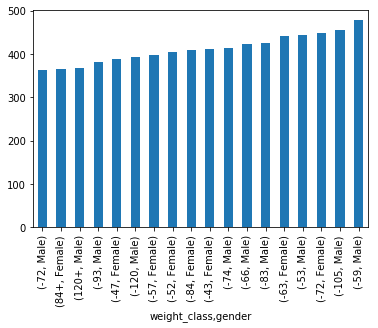

In [58]:
df.groupby(('weight_class', 'gender'))['score'].mean().sort_values().plot(kind='bar')
plt.show()

In [73]:
def men_wilks(x): 
    a=-216.0475144
    b=16.2606339
    c=-0.002388645
    d=-0.00113732
    e=7.01863E-06
    f=-1.291E-08
    bottom = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5
    return float(500)/ bottom

In [74]:
def women_wilks(x): 
    a=594.31747775582
    b=-27.23842536447
    c=0.82112226871
    d=-0.00930733913
    e=4.731582E-05
    f=-9.054E-08
    bottom = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5
    return float(500)/ bottom

In [84]:
# x = np.array([47, 52, 57, 63, 72, 84, 90])
# x2 = np.array([59, 66, 74, 83, 93, 105, 120, 130])
x = np.arange(40, 150, 10)

w_wilks = women_wilks(x)
m_wilks = men_wilks(x)

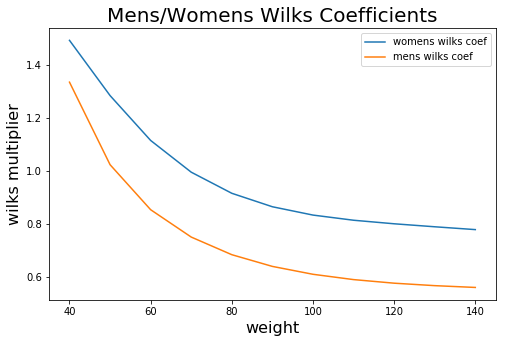

In [97]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(x, w_wilks, label='womens wilks coef')
ax.plot(x, m_wilks, label= 'mens wilks coef')
ax.set_xlabel('weight', fontsize=16)
ax.set_ylabel('wilks multiplier', fontsize=16)
ax.set_title('Mens/Womens Wilks Coefficients', fontsize=20)


plt.legend(loc='best')

plt.show()

In [116]:
def d_woman_wilks(x):
    a=594.31747775582
    b=-27.23842536447
    c=0.82112226871
    d=-0.00930733913
    e=4.731582E-05
    f=-9.054E-08
    bottom = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5
    top = b + c*2*x + d*3*x**2 + e*4*x**3 + f*5*x**4
    return -(500 * top)/(bottom**2)
    

In [117]:
def d_man_wilks(x):
    a=-216.0475144
    b=16.2606339
    c=-0.002388645
    d=-0.00113732
    e=7.01863E-06
    f=-1.291E-08
    bottom = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5
    top = b + c*2*x + d*3*x**2 + e*4*x**3 + f*5*x**4
    return -(500*top)/(bottom**2)

In [118]:
d_w_wilks = d_woman_wilks(x)
d_m_wilks = d_man_wilks(x)

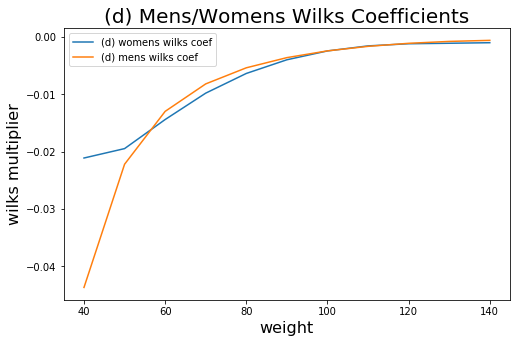

In [119]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(x, d_w_wilks, label='(d) womens wilks coef')
ax.plot(x, d_m_wilks, label= '(d) mens wilks coef')
ax.set_xlabel('weight', fontsize=16)
ax.set_ylabel('wilks multiplier', fontsize=16)
ax.set_title('(d) Mens/Womens Wilks Coefficients', fontsize=20)


plt.legend(loc='best')

plt.show()

In [110]:
# # w_wilks_score = women_wilks(x) * 500
# # m_wilks_score = men_wilks(x) * 500

# d_w_wilks_score = d_woman_wilks(x) * 500
# d_m_wilks_score = d_man_wilks(x) * 500

# fig = plt.figure(figsize=(8,5))
# ax = fig.gca()

# ax.plot(x, w_wilks_score, label='womens wilks score (500)')
# ax.plot(x, m_wilks_score, label= 'mens wilks score (500)')
# ax.set_xlabel('weight', fontsize=16)
# ax.set_ylabel('wilks score', fontsize=16)
# ax.set_title('Mens/Womens Wilks Scores (500 total)', fontsize=20)


# plt.legend(loc='best')

# plt.show()

In [111]:
# fig = plt.figure(figsize=(8,5))
# ax = fig.gca()

# ax.plot(x, d_w_wilks_score, label='(d) womens wilks coef')
# ax.plot(x, d_m_wilks_score, label= '(d) mens wilks coef')
# ax.set_xlabel('weight', fontsize=16)
# ax.set_ylabel('wilks multiplier', fontsize=16)
# ax.set_title('(d) Mens/Womens Wilks score', fontsize=20)


# plt.legend(loc='best')

# plt.show()